In [145]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')


### Задание 3.1

In [146]:
def generate_data(n_points=20):
    X = np.linspace(-5, 5, n_points)
    y = 10 * X - 7

    X_train = X[0::2].reshape(-1, 1)
    y_train = y[0::2] + np.random.randn(int(n_points / 2)) * 10

    X_test = X[1::2].reshape(-1, 1)
    y_test = y[1::2] + np.random.randn(int(n_points / 2)) * 10

    print(f'Generated {len(X_train)} train samples and {len(X_test)} test samples')
    return X, X_train, y_train, X_test, y_test

In [147]:
X, X_train, y_train, X_test, y_test = generate_data(100)


Generated 50 train samples and 50 test samples


1. Реализуйте настройку w и b с помощью рассмотренного выше метода наименьших квадратов.
2. Найдите значения метрик MSE и MAE. Сравните с результатами из sklearn

In [148]:
X_train = np.column_stack((X_train, [1] * len(X_train)))
X_test = np.column_stack((X_test, [1] * len(X_test)))
w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

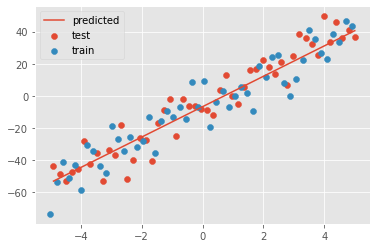

In [149]:
plt.scatter(X_test[:, 0], y_test, label='test')
plt.scatter(X_train[:, 0], y_train, label='train')
plt.plot(X_test[:, 0], X_test.dot(w), label="predicted")
plt.legend(loc='best')

In [150]:
my_mse = np.mean((y_test - X_test.dot(w)) ** 2)
my_mae = np.mean(abs(y_test - X_test.dot(w)))
print("Our MSE value: ", my_mse)
print("Our MAE value: ", my_mae)

Our MSE value:  80.69961368480436
Our MAE value:  6.974378092316646


In [151]:
model=LinearRegression()
model.fit(X_train,y_train)
skl_mse = mean_squared_error(model.predict(X_test), y_test)
skl_mae = mean_absolute_error(model.predict(X_test), y_test)

print("Sklearn MSE value: ", skl_mse)
print("Sklearn MAE value: ", skl_mae)

Sklearn MSE value:  80.69961368480436
Sklearn MAE value:  6.974378092316645


Результаты нашей реализации совпали с результатами встроенного метода sklearn

### Задание 3.2

In [152]:
def generate_wave_set(n_support=1000, n_train=25, std=0.3, periods=2):
    data = {}
    data['support'] = np.linspace(0, periods * np.pi, num=n_support)
    data['values'] = np.sin(data['support']) + 1
    data['x_train'] = np.sort(np.random.choice(data['support'], size=n_train, replace=True))
    data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0, std, size=data['x_train'].shape[0])
    return data


data = generate_wave_set(1000, 250)

1. Попробуйте реализовать настройку w и b с помощью рассмотренного метода наименьших квадратов.
2. Найдите значения метрик MSE и MAE

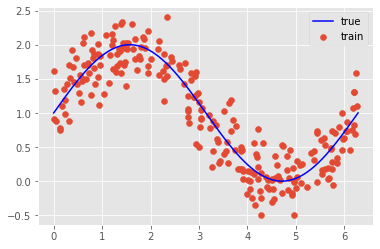

In [153]:
plt.scatter(data['x_train'], data['y_train'], label='train')
plt.plot(data['support'], data['values'], label='true', color='blue')
plt.legend(loc='best')

In [154]:
X_train = np.column_stack((np.sin(data['x_train']), [1] * len(data['x_train'])))
X_test = np.column_stack((np.sin(data['support']), [1] * len(data['support'])))
w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(data['y_train'])

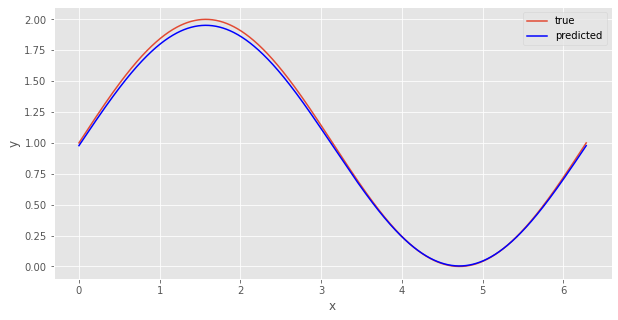

In [155]:
plt.figure(figsize=(10, 5))
plt.xlabel('x')
plt.ylabel('y')
plt.plot(data['support'], data['values'], label='true')
plt.plot(data['support'], X_test.dot(w), label="predicted", color='blue')
plt.legend(loc='best')

In [156]:
mean_absolute_error(data['values'], X_test.dot(w))

0.023126097301380877

### Задание 3.3

1. Реализуйте полиномиальную регрессию. Сделайте визуализацию для полиномов разных степеней.
Полином какой степени подходит больше других? Почему?

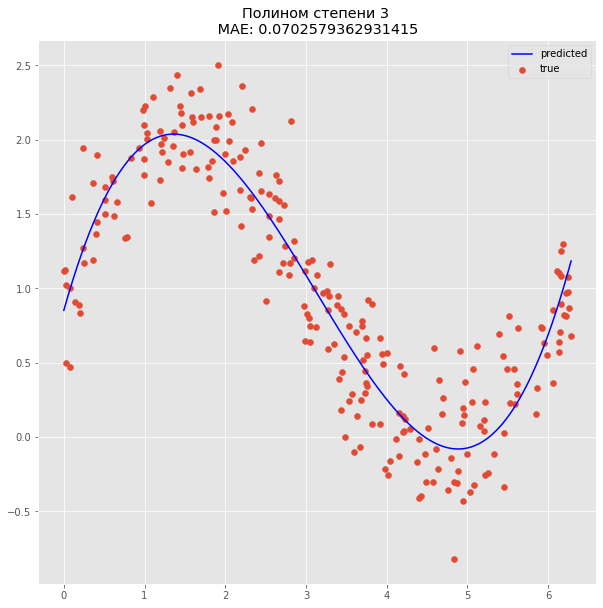

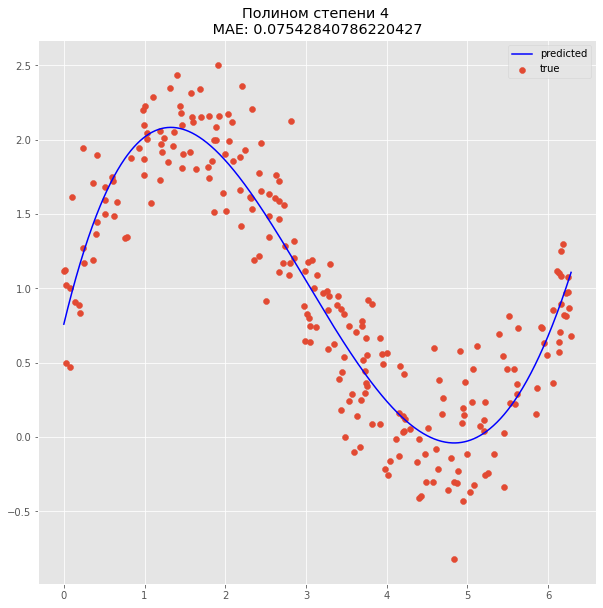

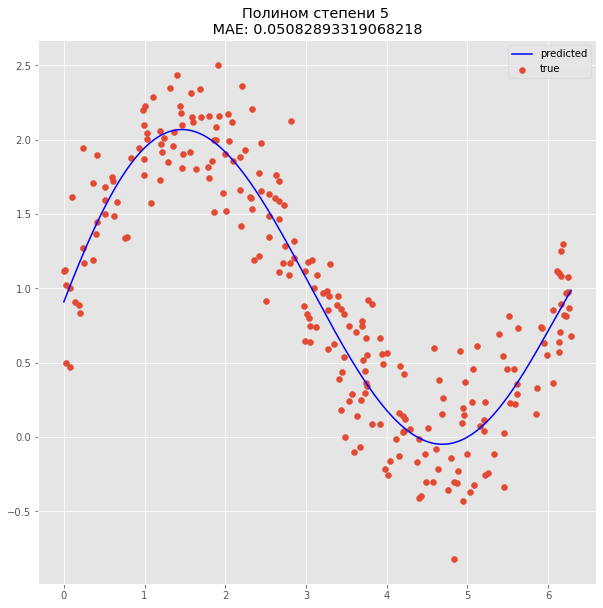

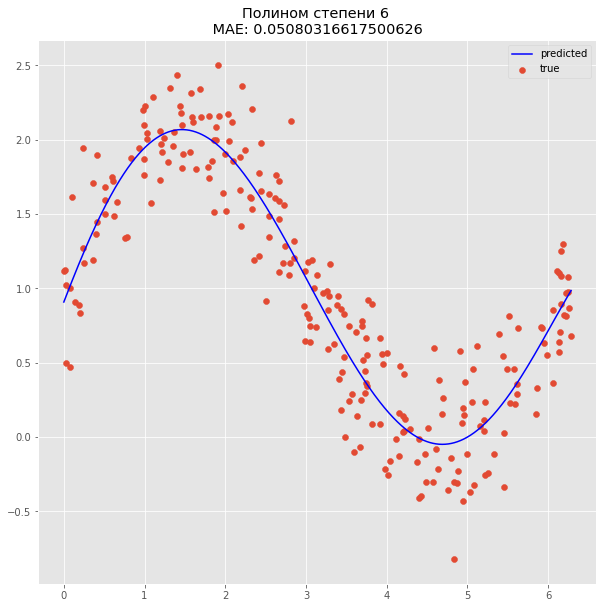

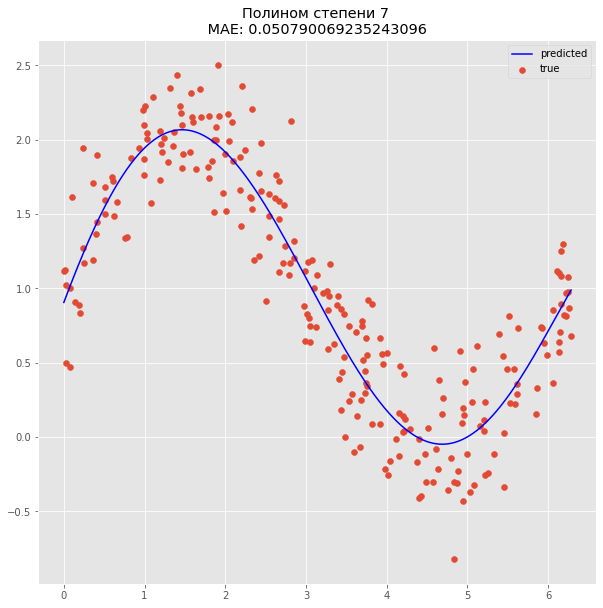

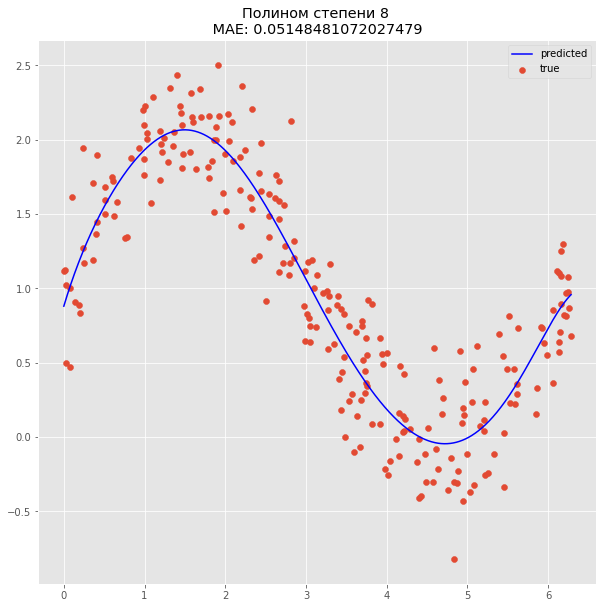

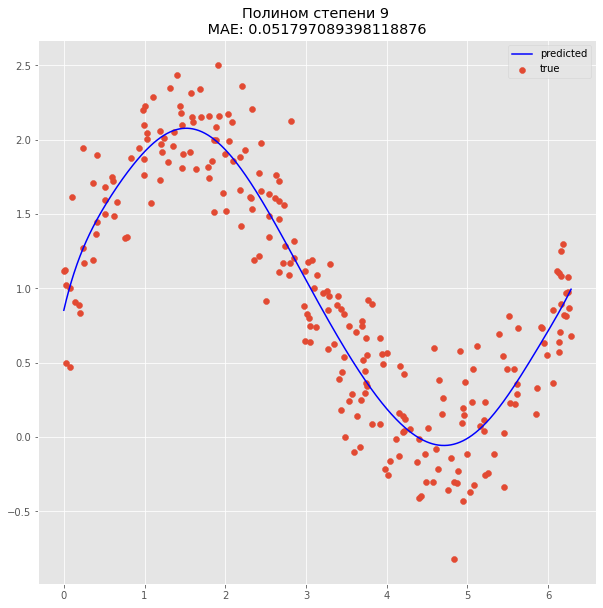

In [157]:
data = generate_wave_set(1000, 250, periods=2)
degrees = [3, 4, 5, 6, 7, 8, 9]
maes = []
for i in range(len(degrees)):
    polynomial_features = PolynomialFeatures(degrees[i])
    X_train = data['x_train']
    y_train = data['y_train']
    X_test = data['support']
    y_test = data['values']
    X_train = polynomial_features.fit_transform(X_train.reshape(-1, 1))
    X_test = polynomial_features.fit_transform(X_test.reshape(-1, 1))
    model=LinearRegression()
    model.fit(X_train,y_train)
    plt.figure(figsize=(10, 10))
    plt.title(f'Полином степени {degrees[i]} \n '
              f'MAE: {mean_absolute_error(model.predict(X_test),y_test)} ')
    plt.plot(data['support'], model.predict(X_test), label='predicted', color='blue')
    plt.scatter(data['x_train'], y_train, label='true')
    plt.legend(loc='best')
    maes.append(mean_absolute_error(data['values'], model.predict(X_test)))

In [158]:
print(f"Лучшая с точки зрения средней абсолютной ошибки степень полинома: {degrees[maes.index(min(maes))]}")
print("С точки зрения избежания переобучения - 3")

Лучшая с точки зрения средней абсолютной ошибки степень полинома: 7
С точки зрения избежания переобучения - 3


### Задание 3.4

In [159]:
house_data = load_boston()
boston = pd.DataFrame(house_data.data, columns=house_data.feature_names)
X_train, X_test, y_train, y_test = train_test_split(house_data.data, house_data.target, train_size=0.5,
                                                    random_state=144)
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([-8.01298149e-02,  2.77114421e-02,  4.41182244e-02,  3.44042824e+00,
       -1.82275247e+01,  3.24556840e+00,  9.81637968e-03, -1.28248455e+00,
        3.49745720e-01, -1.17305074e-02, -9.62525523e-01,  8.38957104e-03,
       -5.93525148e-01])

In [160]:
predicted = model.predict(X_test)
print(f"MAE: {mean_absolute_error(predicted, y_test)}")
print(f"MSE: {mean_squared_error(predicted, y_test)}")

MAE: 3.519013200869978
MSE: 22.577951105825935


In [161]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LinearRegression()
model.fit(X_train, y_train)
model.coef_

array([-0.65669866,  0.62355692,  0.29267731,  0.88442735, -2.14555967,
        2.03783782,  0.26651043, -2.70724062,  3.0476841 , -1.94459491,
       -2.09107854,  0.72192706, -4.19089329])

In [162]:
ind = np.argpartition(abs(model.coef_), -7)[-7:]
X_test = X_test[:, ind]
model.fit(X_train[:, ind],y_train)
predicted = model.predict(X_test)
print(f"MAE: {mean_absolute_error(predicted, y_test)}")
print(f"MSE: {mean_squared_error(predicted, y_test)}")

MAE: 3.71701605408675
MSE: 24.978293258915475


### Задание 3.5
Реализуйте настройку параметров модели не с помощью встроенной функции, а с помощью своей реализации.

Настроить параметры нужно либо с помощью стохастического градиентного спуска либо с помощью mini-batch градиентного спуска. Нужно использовать регуляризацию L1, L2 или Elastic Net.

In [163]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [164]:
training_data = pd.read_excel('predict_house_price_training_data.xlsx')
training_values = training_data['Целевая.Цена']
training_points = training_data.drop('Целевая.Цена', axis=1)
training_values.head(100)

0      830000
1      385000
2      610000
3      550000
4     1300000
       ...   
95     328000
96     473000
97     699188
98     605000
99     325000
Name: Целевая.Цена, Length: 100, dtype: int64

In [165]:
def count_grad(X, y, w, batch, h):
    X = np.array(X)
    y = np.array(y)
    w = np.array(w)
    grads = []
    error = np.mean((np.dot(X[batch], w) - y[batch]) * 2)
    for dim_num in range(X.shape[1]):
        if dim_num != X.shape[1] - 1:
            grads.append(error * np.mean(X[batch, dim_num]) + 2 * 20 * w[dim_num])
        else:
            grads.append(error * np.mean(X[batch, dim_num]))
    return w - h * np.array(grads)


def SGD(X, y, w, batch_size=50):
    iter_num = 0
    while iter_num < 100000:
        random_ind = np.random.randint(0, X.shape[0], batch_size)
        new_w = count_grad(X, y, w, random_ind, h=6e-9 / np.sqrt(iter_num + 1))
        iter_num += 1
        w = new_w
    return w


w = SGD(np.column_stack((training_points, [1] * len(training_points))), training_values,
        np.ones(training_points.shape[1] + 1))
print(w)
linear_reg = LinearRegression()
_ = linear_reg.fit(training_points, training_values)

[  1.14852776   1.09918894 102.59596428  -0.17665789   1.06611332
   1.0014755    1.02154509   1.15016484   1.34661909  85.48359202
  18.11222083  85.24533625   7.43687497   3.03941854  -4.23645926
   1.04284029]


### Задание 3.6

In [166]:
testing_data = pd.read_excel('predict_house_price_test_data.xlsx')
testing_values = testing_data['Целевая.Цена']
testing_points = testing_data.drop('Целевая.Цена', axis=1)
training_data = pd.read_excel('predict_house_price_training_data.xlsx')
training_values = training_data['Целевая.Цена']
training_points = training_data.drop('Целевая.Цена', axis=1)
column_names = list(testing_data.columns)[1:16]

In [167]:
print("MAE mini-batch GD: ",
      mean_absolute_error(np.column_stack((testing_points, [1] * len(testing_points))).dot(w), testing_values))
print("MAE sklearn LinearRegression: ", mean_absolute_error(linear_reg.predict(testing_points), testing_values))
print("MSE mini-batch GD: ",
      mean_squared_error(np.column_stack((testing_points, [1] * len(testing_points))).dot(w), testing_values))
print("MSE sklearn LinearRegression: ", mean_squared_error(linear_reg.predict(testing_points), testing_values))

MAE mini-batch GD:  174752.7462185699
MAE sklearn LinearRegression:  126852.51255003951
MSE mini-batch GD:  79629903639.45288
MSE sklearn LinearRegression:  40756843765.09923


Модель sklearn лучше показала себя на тестовых данных

### Задание 3.7

Значимость признаков

In [168]:
feature_importance1 = pd.DataFrame(columns=['Название признака', 'Важность признака'])
feature_importance1['Название признака'] = column_names
feature_importance1['Важность признака'] = w[0:15]
feature_importance1.sort_values(by='Важность признака', ascending=False)

,Название признака,Важность признака
2,Жилая площадь,102.595964
9,Площадь без подвала,85.483592
11,Год постройки,85.245336
10,Площадь подвала,18.112221
12,Год реновации,7.436875
13,Широта,3.039419
8,Оценка риелтора,1.346619
7,Состояние,1.150165
0,Спальни,1.148528
1,Ванные,1.099189


### Задание 3.8

Напомню исходную постановку задачи. Мы говорили о том, что оценка цены на недвижимость может быть нужна для выявления аномально низких цен на объект недвижимости. Давайте попробуем найти такие в датасете.

In [169]:
testing_points=np.column_stack((testing_points, [1] * len(testing_points)))
mae = mean_absolute_error(testing_points.dot(w), testing_values)
abnormal = testing_data[(testing_data['Целевая.Цена'] < testing_points.dot(w) - 2 * mae)]
abnormal.head()

,Целевая.Цена,Спальни,Ванные,Жилая площадь,Общая площадь,Количество этажей,Вид на воду,Просмотрены ранее,Состояние,Оценка риелтора,Площадь без подвала,Площадь подвала,Год постройки,Год реновации,Широта,Долгота
49,386500,4,2.50,3110,5048,2.0,0,0,3,8,3110,0,2002,0,47.3782,-122.125
137,384000,5,2.75,3220,8160,2.0,0,0,3,9,3220,0,1999,0,47.3154,-122.254
189,429900,4,3.25,3760,4675,2.0,0,0,3,8,2740,1020,2007,0,47.3862,-122.048
287,490000,4,4.25,4480,5715,2.0,0,0,3,7,3680,800,2003,0,47.3730,-122.179
412,445000,5,3.00,3880,7180,2.0,0,0,3,7,3880,0,2004,0,47.4797,-122.179
